In [1]:
import pickle
import pandas as pd
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_labels_name(filename):
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load data
train = unpickle('./cifar-100-python/train')
X_train = train.get(b'data')
y_train = train.get(b'fine_labels')

name = load_labels_name('./cifar-100-python/meta')

test = unpickle('./cifar-100-python/test')
X_test = test.get(b'data')
y_test = test.get(b'fine_labels')
print(X_test.shape)

(10000, 3072)


In [4]:
# vistualize sample image
# from PIL import Image
# %matplotlib inline
from matplotlib import pyplot as plt

X_train=X_train.reshape(-1,3,32,32)
X_train=np.rollaxis(X_train, 1, 4)
X_test=X_test.reshape(-1,3,32,32)
X_test=np.rollaxis(X_test, 1, 4)
X_train.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, 'apple')

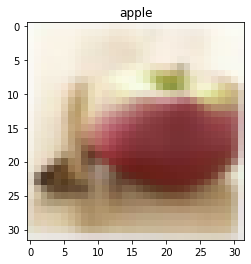

In [5]:
plt.figure(figsize=(4,4))
index = 2
plt.rcParams["axes.grid"] = False
plt.imshow(X_train[index])
plt.title(name['fine_label_names'][y_train[index]])

Data preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Standardization
X_train = X_train.reshape(-1, 3072)
X_test = X_test.reshape(-1, 3072)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

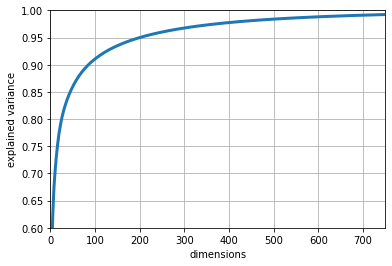

In [7]:
pca_show = PCA()
pca_show.fit(X_train)
cumsum = np.cumsum(pca_show.explained_variance_ratio_)

# Plot the explained variance vs number of dimensions

plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 750, 0.6, 1]) 
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

In [8]:
# Principal component analysis
pca = PCA(n_components = 0.85)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

(50000, 46)

Naïve Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_GaussianNB = nb.predict(X_test)

print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred_GaussianNB, y_test)))

Accuracy on test set: 0.175


              precision    recall  f1-score   support

           0       0.42      0.30      0.35       100
           1       0.24      0.27      0.25       100
           2       0.08      0.05      0.06       100
           3       0.09      0.03      0.04       100
           4       0.04      0.03      0.03       100
           5       0.19      0.10      0.13       100
           6       0.18      0.13      0.15       100
           7       0.12      0.09      0.10       100
           8       0.11      0.18      0.14       100
           9       0.24      0.23      0.24       100
          10       0.09      0.06      0.07       100
          11       0.09      0.05      0.06       100
          12       0.14      0.08      0.10       100
          13       0.11      0.24      0.15       100
          14       0.11      0.05      0.07       100
          15       0.13      0.04      0.06       100
          16       0.38      0.14      0.20       100
          17       0.30    

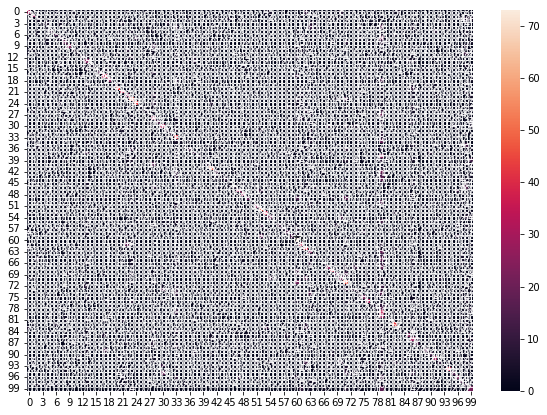

In [10]:
from sklearn import metrics
import seaborn as sn

actual = y_test
print(metrics.classification_report(actual, y_pred_GaussianNB))

# show the confusion matrix
print("confusion matrix:")
m = metrics.confusion_matrix(actual, y_pred_GaussianNB)
print(m)
mplot = pd.DataFrame(m)
plt.figure(figsize=(10,7))
sn.heatmap(mplot,annot = True)
plt.show()


KNN

In [11]:
# from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
alist = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    alist.append(knn.score(X_test,y_test))
print(alist)

[0.1946, 0.1657, 0.1664, 0.1714, 0.1743, 0.1784, 0.1787, 0.1812, 0.1817, 0.1834, 0.1818, 0.182, 0.1826, 0.1837, 0.1838, 0.1839, 0.184, 0.1815, 0.18, 0.1783]


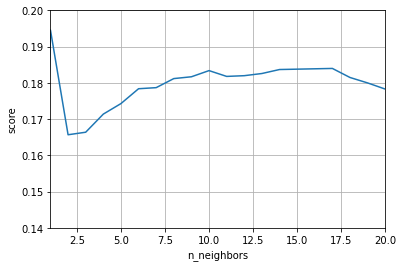

In [12]:
from matplotlib import pyplot as plt
alist = [0, 0.1946, 0.1657, 0.1664, 0.1714, 0.1743, 0.1784, 0.1787, 0.1812, 0.1817, 0.1834, 0.1818, 0.182, 0.1826, 0.1837, 0.1838, 0.1839, 0.184, 0.1815, 0.18, 0.1783]
plt.plot(alist)
plt.axis([1, 20, 0.14, 0.2]) 
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.grid(True)
plt.show()

0.99982
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       100
           1       0.23      0.16      0.19       100
           2       0.23      0.13      0.17       100
           3       0.08      0.05      0.06       100
           4       0.17      0.18      0.17       100
           5       0.11      0.06      0.08       100
           6       0.28      0.19      0.22       100
           7       0.09      0.12      0.10       100
           8       0.18      0.25      0.21       100
           9       0.30      0.29      0.29       100
          10       0.09      0.09      0.09       100
          11       0.32      0.18      0.23       100
          12       0.17      0.13      0.15       100
          13       0.14      0.04      0.06       100
          14       0.13      0.08      0.10       100
          15       0.18      0.15      0.16       100
          16       0.35      0.28      0.31       100
          17       

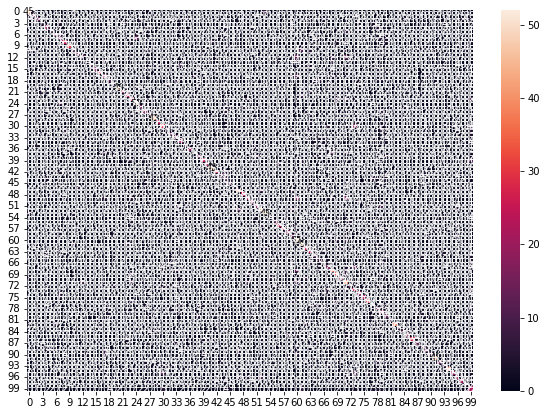

In [13]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
y_pred_knn = knn.predict(X_test)

actual = y_test
print(metrics.classification_report(actual, y_pred_knn))

# show the confusion matrix
print("confusion matrix:")
m = metrics.confusion_matrix(actual, y_pred_knn)
print(m)
mplot = pd.DataFrame(m)
plt.figure(figsize=(10,7))
sn.heatmap(mplot,annot = True)
plt.show()

Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print("Random forest ensemble - accuracy on test set:")
print(accuracy_score(y_test, y_pred_rf))

Random forest ensemble - accuracy on test set:
0.1173


              precision    recall  f1-score   support

           0       0.22      0.34      0.27       100
           1       0.12      0.09      0.10       100
           2       0.12      0.01      0.02       100
           3       0.00      0.00      0.00       100
           4       0.04      0.01      0.02       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.08      0.11      0.09       100
           8       0.00      0.00      0.00       100
           9       0.22      0.24      0.23       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.17      0.01      0.02       100
          13       0.00      0.00      0.00       100
          14       0.08      0.01      0.02       100
          15       0.03      0.01      0.01       100
          16       0.93      0.13      0.23       100
          17       0.09    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


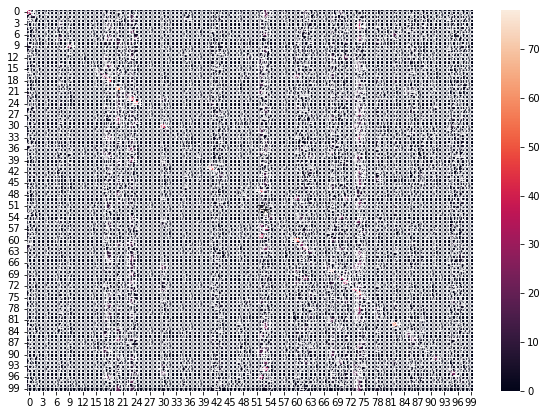

In [15]:
actual = y_test
print(metrics.classification_report(actual, y_pred_rf))

# show the confusion matrix
print("confusion matrix:")
m = metrics.confusion_matrix(actual, y_pred_rf)
print(m)
mplot = pd.DataFrame(m)
plt.figure(figsize=(10,7))
sn.heatmap(mplot,annot = True)
plt.show()

Ada boosting combine GaussianNB

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    GaussianNB(), n_estimators=200, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print("AdaBoost ensemble - accuracy on test set:")
print(accuracy_score(y_test, y_pred_ada))

AdaBoost ensemble - accuracy on test set:
0.1261


              precision    recall  f1-score   support

           0       0.15      0.37      0.21       100
           1       0.18      0.23      0.20       100
           2       0.05      0.07      0.06       100
           3       0.03      0.01      0.01       100
           4       0.10      0.07      0.08       100
           5       0.09      0.08      0.08       100
           6       0.08      0.05      0.06       100
           7       0.06      0.09      0.07       100
           8       0.05      0.01      0.02       100
           9       0.19      0.08      0.11       100
          10       0.06      0.02      0.03       100
          11       0.05      0.05      0.05       100
          12       0.10      0.05      0.07       100
          13       0.08      0.09      0.09       100
          14       0.06      0.06      0.06       100
          15       0.04      0.02      0.03       100
          16       0.10      0.07      0.08       100
          17       0.18    

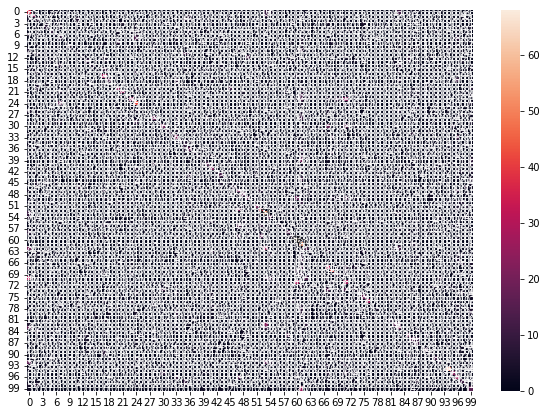

In [17]:
actual = y_test
print(metrics.classification_report(actual, y_pred_ada))

# show the confusion matrix
print("confusion matrix:")
m = metrics.confusion_matrix(actual, y_pred_ada)
print(m)
mplot = pd.DataFrame(m)
plt.figure(figsize=(10,7))
sn.heatmap(mplot,annot = True)
plt.show()